# Project 2 by Anthony Andreev

Dataset: https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste

In this project, I will classify 23 types of sea animals using a CNN. The images vary in viewpoint, illumination, background and animal species. The images are resized to either (300, n) or (n, 300) where n is a pixel size less than 300. Many, like crabs and turtles, are taken when the animals are on land. The rest are underwater. Not all of the animals in the images are real: some are paintings, sculptures, etc. There is likely to be images with more than one possible class. For instance, images in the 'coral' class may contain images of other animals, so the classifier may mislabel an image labeled as 'coral' as 'fish' or another class. This mismatching may affect my results.

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

In [2]:
# Normalize images shown
def imNormalize(image):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
    else:
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r,g,b),axis=2) 

In [3]:
# Set parameters  
INPUT_SIZE = 224
BATCH_SIZE = 16

SEED = 12345
np.random.seed(SEED)
path = r'C:\Users\Illian\Downloads\CS450Project2'
classes = os.listdir(path)

NUMCLASSES = len(classes)

In [4]:
# Make a dataframe with all the file paths and labels
allfilelist = []
alllabels = []
alllabels_word = []
for i in range(NUMCLASSES):
    filepath = path + '/' + classes[i]
    filelist = os.listdir(filepath)
    for f in filelist:
        if f.lower() == 'thumbs.db':
            continue
        
        fullpath = filepath + '/' + f
        allfilelist.append(fullpath)
        alllabels.append(i)
        alllabels_word.append(classes[i])
        
d = {'filename':allfilelist, 'labelnum':alllabels, 'label':alllabels_word}
df = pd.DataFrame(d)

In [5]:
# Shuffle the data
df = df.sample(frac=1.0)
df.tail()

filename  labelnum  \
11689  C:\Users\Illian\Downloads\CS450Project2/Turtle...        21   
3492   C:\Users\Illian\Downloads\CS450Project2/Jelly ...         6   
2177   C:\Users\Illian\Downloads\CS450Project2/Dolphi...         3   
11749  C:\Users\Illian\Downloads\CS450Project2/Turtle...        21   
4578   C:\Users\Illian\Downloads\CS450Project2/Lobste...         7   

                 label  
11689  Turtle_Tortoise  
3492        Jelly Fish  
2177           Dolphin  
11749  Turtle_Tortoise  
4578           Lobster

# Let's see what the data looks like

In [6]:
# Number of images 
len(df)

13711

In [7]:
# List of classes
classes

['Clams',
 'Corals',
 'Crabs',
 'Dolphin',
 'Eel',
 'Fish',
 'Jelly Fish',
 'Lobster',
 'Nudibranchs',
 'Octopus',
 'Otter',
 'Penguin',
 'Puffers',
 'Sea Rays',
 'Sea Urchins',
 'Seahorse',
 'Seal',
 'Sharks',
 'Shrimp',
 'Squid',
 'Starfish',
 'Turtle_Tortoise',
 'Whale']

In [8]:
# Number of classes
NUMCLASSES

23

In [9]:
# Number of images per class
vc = df['label'].value_counts()
vc

Turtle_Tortoise    1903
Jelly Fish          845
Dolphin             782
Sharks              590
Sea Urchins         579
Whale               572
Octopus             562
Puffers             531
Sea Rays            517
Nudibranchs         500
Otter               500
Corals              500
Lobster             499
Crabs               499
Starfish            499
Clams               497
Eel                 497
Fish                494
Shrimp              488
Squid               483
Penguin             482
Seahorse            478
Seal                414
Name: label, dtype: int64

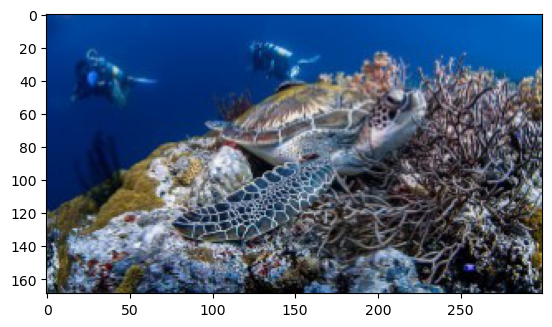

In [10]:
# Show a random image
img = imNormalize(io.imread(df['filename'][11689]))
plt.imshow(img)

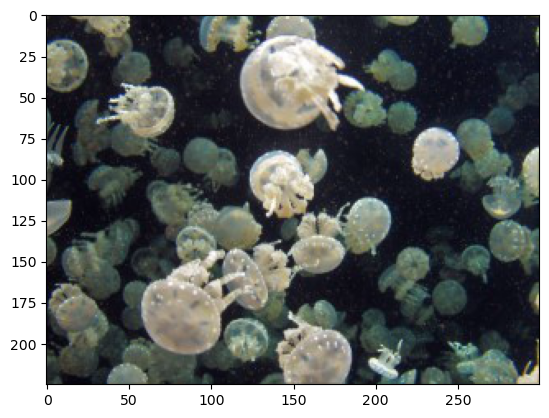

In [11]:
# Show a random image
img = imNormalize(io.imread(df['filename'][3492]))
plt.imshow(img)

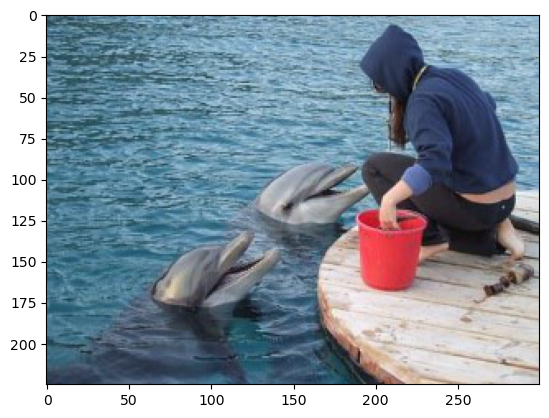

In [12]:
# Show a random image
img = imNormalize(io.imread(df['filename'][2177]))
plt.imshow(img)

# Now we extract the data

In [13]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import vgg16


traindf, testdf = train_test_split(df, test_size=0.2)

In [14]:
# Generates train data
train_datagen = ImageDataGenerator(
                                featurewise_center=False,
                                samplewise_center=True,
                                featurewise_std_normalization=False,
                                samplewise_std_normalization=True,
                                zca_epsilon=1e-06,
                                rotation_range=0,
                                width_shift_range=0.00,
                                height_shift_range=0.00,
                                brightness_range=None,
                                shear_range=0.0,
                                zoom_range=0.00,
                                channel_shift_range=0.0,
                                fill_mode="nearest",
                                cval=0.0,
                                horizontal_flip=False,
                                vertical_flip=False,
                                rescale=1./255,
                                preprocessing_function=vgg16.preprocess_input,
                                data_format=None,
                                validation_split=0.2,
                                dtype=None,
                            )
# Generates test data
test_datagen = ImageDataGenerator(
                                featurewise_center=False,
                                samplewise_center=True,
                                featurewise_std_normalization=False,
                                samplewise_std_normalization=True,
                                zca_epsilon=1e-06,
                                rotation_range=0,
                                width_shift_range=0.00,
                                height_shift_range=0.00,
                                brightness_range=None,
                                shear_range=0.0,
                                zoom_range=0.00,
                                channel_shift_range=0.0,
                                fill_mode="nearest",
                                cval=0.0,
                                horizontal_flip=False,
                                vertical_flip=False,
                                rescale=1./255,
                                preprocessing_function=vgg16.preprocess_input,
                                data_format=None,
                                validation_split=0.0,
                                dtype=None,
                            )


In [15]:
# Train data
training_set = train_datagen.flow_from_dataframe( 
                                            dataframe=traindf,
                                            directory='',
                                            x_col="filename",
                                            y_col="label",
                                            #weight_col=None,
                                            target_size=(INPUT_SIZE, INPUT_SIZE),
                                            color_mode="rgb",
                                            classes=None,
                                            class_mode="categorical",
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            seed=None,
                                            save_to_dir=None,
                                            save_prefix="",
                                            save_format="png",
                                            subset='training',
                                            interpolation="nearest",
                                            #validate_filenames=True
                                        )
# Validation data
validation_set = train_datagen.flow_from_dataframe( dataframe=traindf,
                                            directory='',
                                            x_col="filename",
                                            y_col="label",
                                            #weight_col=None,
                                            target_size=(INPUT_SIZE, INPUT_SIZE),
                                            color_mode="rgb",
                                            classes=None,
                                            class_mode="categorical",
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            seed=None,
                                            save_to_dir=None,
                                            save_prefix="",
                                            save_format="png",
                                            subset='validation',
                                            interpolation="nearest",
                                            #validate_filenames=True
                                            )
# Test data
test_set = test_datagen.flow_from_dataframe( dataframe=testdf,
                                            directory='',
                                            x_col="filename",
                                            y_col="label",
                                            #weight_col=None,
                                            target_size=(INPUT_SIZE, INPUT_SIZE),
                                            color_mode="rgb",
                                            classes=None,
                                            class_mode="categorical",
                                            batch_size=BATCH_SIZE,
                                            shuffle=False,
                                            seed=None,
                                            save_to_dir=None,
                                            save_prefix="",
                                            save_format="png",
                                            subset='training',
                                            interpolation="nearest",
                                            #validate_filenames=True
                                            )

Found 8775 validated image filenames belonging to 23 classes.
Found 2193 validated image filenames belonging to 23 classes.
Found 2743 validated image filenames belonging to 23 classes.


# Time to start building our model!

In [16]:
#Load the VGG model
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(INPUT_SIZE, INPUT_SIZE, 3))

# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001A5FF747940> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001A5FF7952A0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001A5FF7967A0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001A5FF796140> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001A5FF795960> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001A5FF797820> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001A5FF795F00> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001A5FF797CA0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001A5FF795120> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001A5FFAE24A0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001A5FFAE2E60> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001A5FFAE3640> False
<keras.layers.convolutional.conv2d.Conv2D object

In [17]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUMCLASSES, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3211392   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 23)                2967      
                                                                 
Total params: 17,929,047
Trainable params: 10,293,783
Non-trainable params: 7,635,264
_________________________________________________________________


# Here we train the CNN

In [19]:
#Training

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])
num_epochs = 10
history = model.fit(training_set, steps_per_epoch=len(training_set), epochs=num_epochs, validation_data=validation_set,
                   validation_steps = len(validation_set))

model.save_weights("project2.h5")
print("Saved model to disk after",num_epochs,"epochs.")
# model.load_weights('project2.h5')

Epoch 1/10
549/549 [==============================] - 4275s 8s/step - loss: 1.5073 - acc: 0.5619 - val_loss: 1.1273 - val_acc: 0.6685
Epoch 2/10
549/549 [==============================] - 4166s 8s/step - loss: 0.8891 - acc: 0.7426 - val_loss: 1.0481 - val_acc: 0.7000
Epoch 3/10
549/549 [==============================] - 4059s 7s/step - loss: 0.6244 - acc: 0.8226 - val_loss: 1.1860 - val_acc: 0.7246
Epoch 4/10
549/549 [==============================] - 4376s 8s/step - loss: 0.4834 - acc: 0.8685 - val_loss: 1.3093 - val_acc: 0.7036
Epoch 5/10
549/549 [==============================] - 4186s 8s/step - loss: 0.3877 - acc: 0.8947 - val_loss: 1.3711 - val_acc: 0.6968
Epoch 6/10
549/549 [==============================] - 3272s 6s/step - loss: 0.2993 - acc: 0.9167 - val_loss: 2.5987 - val_acc: 0.6876
Epoch 7/10
549/549 [==============================] - 3308s 6s/step - loss: 0.2768 - acc: 0.9307 - val_loss: 1.8470 - val_acc: 0.7314
Epoch 8/10
549/549 [==============================] - 3325s 6s

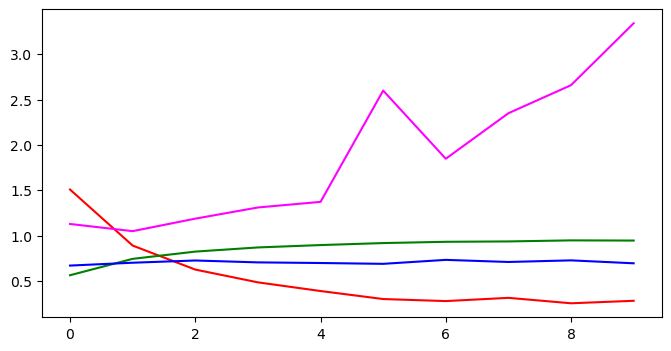

In [20]:
# Plot accuracy and loss during training
fig = plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['acc'],color='green')
plt.plot(history.history['val_loss'],color='magenta')
plt.plot(history.history['val_acc'],color='blue')
plt.show()

# Finally, we analyze how our CNN does on the test data!

In [21]:
# Get model score on test set
score = model.evaluate(test_set, steps = len(test_set), verbose = 1)
print(score[1])

172/172 [==============================] - 685s 4s/step - loss: 3.0660 - acc: 0.6919
0.6919431090354919


172/172 [==============================] - 669s 4s/step


<Axes: >

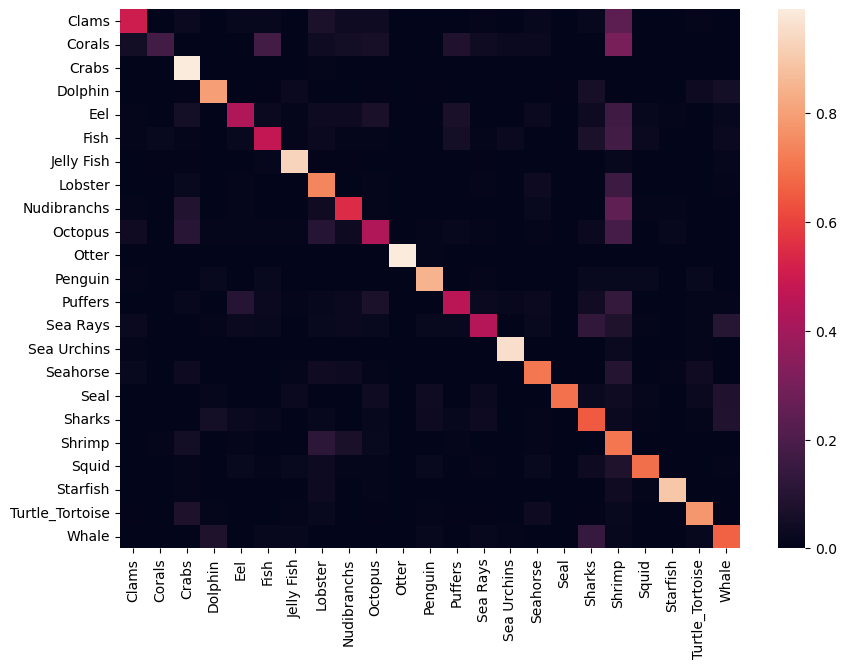

In [22]:
# Make predictions on test data, then visualize results by Normalized confusion matrix
import seaborn as sn

conf = np.zeros([NUMCLASSES,NUMCLASSES])
# Make predictions
preds = model.predict(test_set, steps=len(test_set))

# 1-D array of predicted labels
predLabels = np.argmax(preds, axis = 1)
# 1-D array of test labels
testLabels = test_set.classes

for index in range(len(predLabels)):
    # Predicted label
    guess = predLabels[index]
    # Test label
    real = testLabels[index]
    
    conf[real,guess] = conf[real,guess] + 1
    testLabels.append(real)
    
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums, [NUMCLASSES, 1])
rowsums = np.repeat(rowsums, NUMCLASSES, axis = 1)
conf = conf / rowsums
df_cm = pd.DataFrame(conf, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=False)

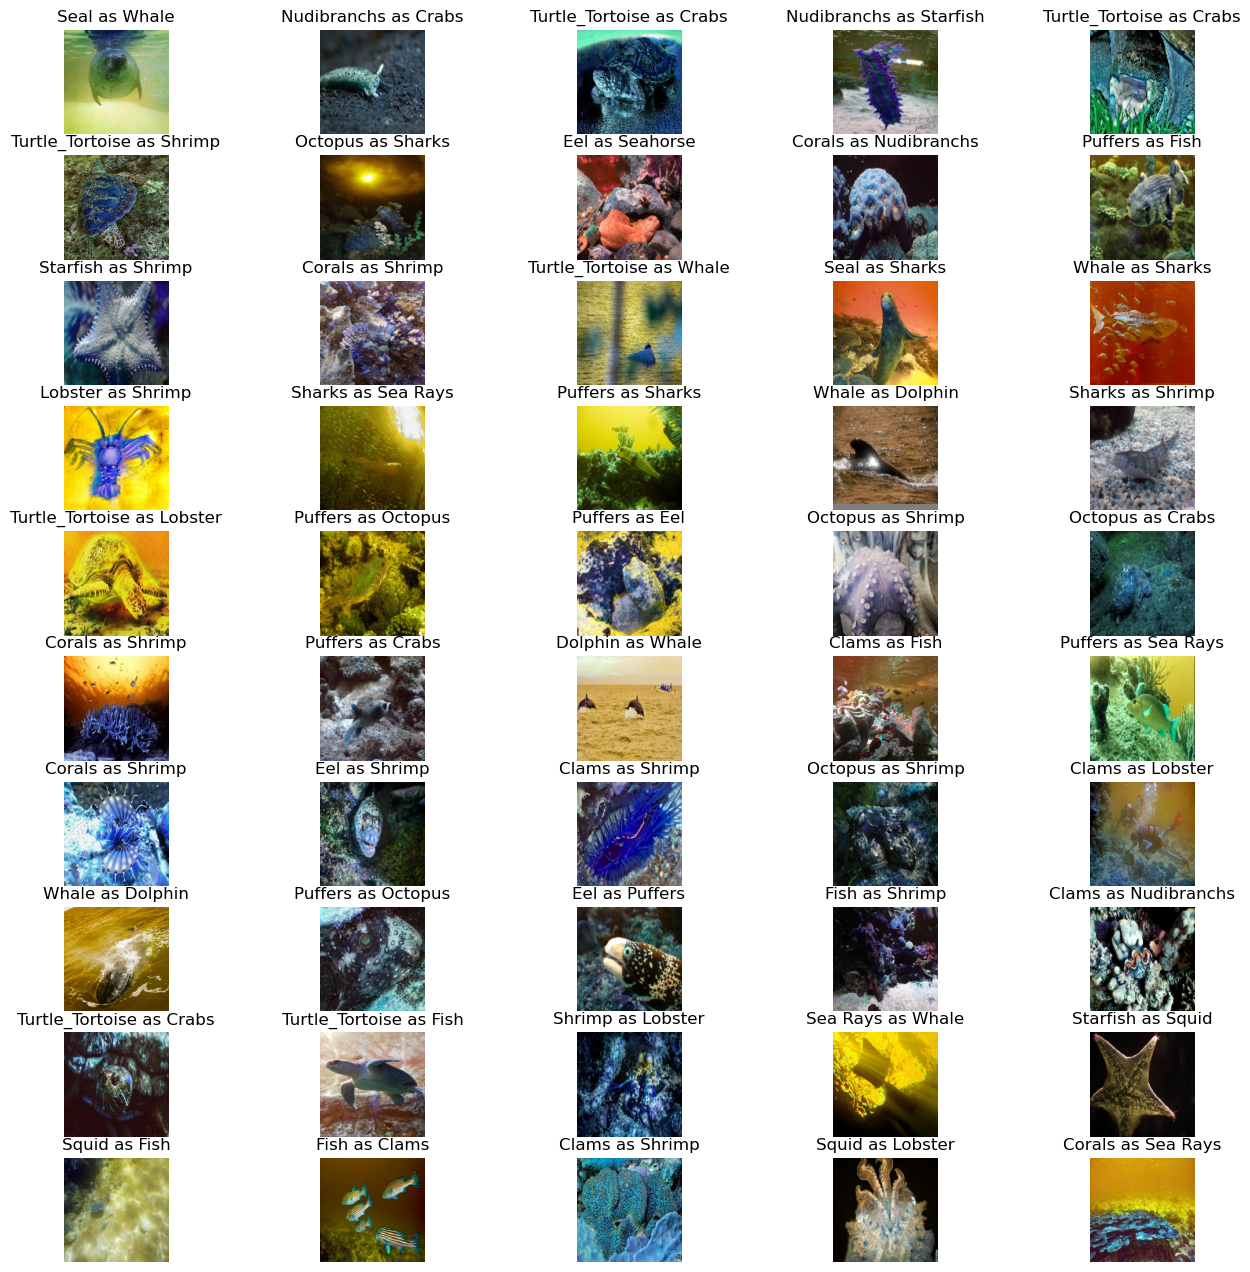

In [64]:
# Show wrong results

rows = 10
cols = 5
fig = plt.figure(figsize=(16, 16))
count = 0

# Make into same size as predLabels
testLabels = testLabels[:2743]
# Boolean array where 'True' means labels are unequal
wrong = np.not_equal(predLabels, testLabels)

for index in range(len(wrong)):
    if wrong[index]:  
        
        count += 1
        # Get indices in test data corresponding to index
        batchNum = index // BATCH_SIZE
        imageNum = index % BATCH_SIZE
        # Test image
        image = imNormalize(test_set[batchNum][0][imageNum])
        
        temp = fig.add_subplot(rows, cols, count)
        temp.imshow(image)
        temp.axis('off')
        temp.title.set_text(classes[testLabels[index]] + ' as ' + classes[predLabels[index]])
    if count == rows * cols:
        break
plt.show()

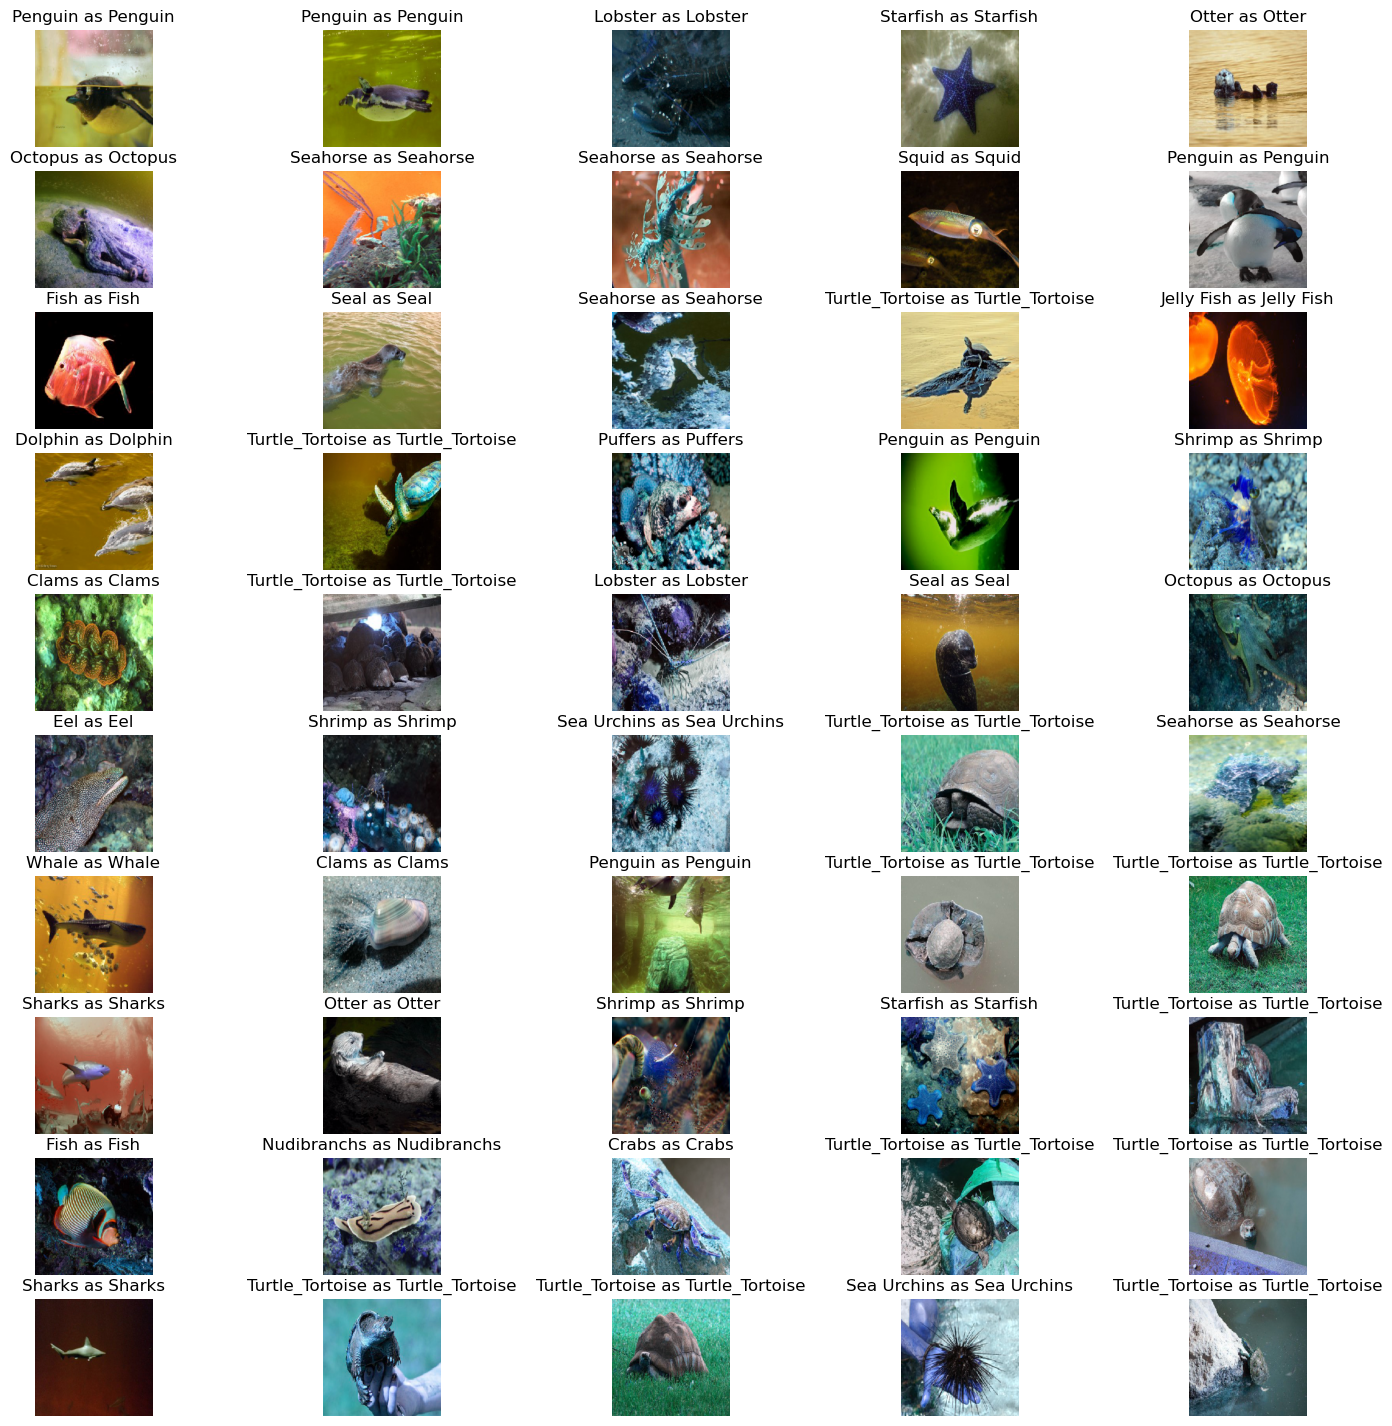

In [65]:
# Show correct results

rows = 10
cols = 5
count = 0
fig = plt.figure(figsize=(18, 18))

for index in range(len(wrong)):
    if wrong[index] == False:
        
        count += 1
        # Get indices in test data corresponding to index
        batchNum = index // BATCH_SIZE
        imageNum = index % BATCH_SIZE
        # Test image
        image = imNormalize(test_set[batchNum][0][imageNum])
        
        temp = fig.add_subplot(rows, cols, count)
        temp.imshow(image)
        temp.axis('off')
        temp.title.set_text(classes[testLabels[index]] + ' as ' + classes[predLabels[index]])
    if count == rows * cols:
        break
plt.show()

1/1 [==============================] - 0s 436ms/step
Actual Class: Clams
Predictions:
Clams : 0.9973189
Shrimp : 0.001756574
Octopus : 0.0009162431
Seahorse : 7.847057e-06
Nudibranchs : 3.1609312e-07


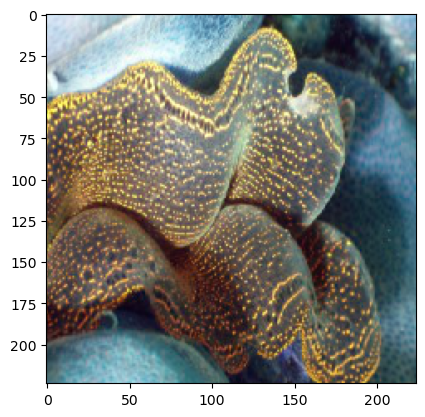

In [66]:
# Prediction example

img = test_set[10][0][0]
plt.imshow(imNormalize(img))

# Convert to tensor
img = np.expand_dims(img, axis=0)
# Make predictions
preds = model.predict(img,steps=1)
preds = preds.flatten()
#print("Output Probabilities:", preds)
# Get classes with highest probabilities
order = np.argsort(preds)
order = order[::-1]

print('Actual Class:',classes[np.argmax(test_set[10][1][0])])

# Top 5
print('Predictions:')
for i in range(5):
    if preds[order[i]] == 0:
        break
    else:
        print(classes[order[i]], ':', preds[order[i]])

1/1 [==============================] - 0s 322ms/step
Actual Class: Sea Rays
Predictions:
Sea Rays : 0.8686091
Penguin : 0.10532387
Squid : 0.026024427
Puffers : 2.1547285e-05
Nudibranchs : 9.92353e-06


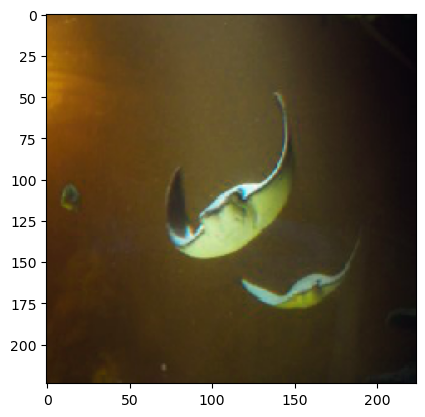

In [67]:
# Prediction example

img = test_set[10][0][1]
plt.imshow(imNormalize(img))

# Convert to tensor
img = np.expand_dims(img, axis=0)
# Make predictions
preds = model.predict(img,steps=1)
preds = preds.flatten()
#print("Output Probabilities:", preds)
# Get classes with highest probabilities
order = np.argsort(preds)
order = order[::-1]

print('Actual Class:',classes[np.argmax(test_set[10][1][1])])

# Top 5
print('Predictions:')
for i in range(5):
    if preds[order[i]] == 0:
        break
    else:
        print(classes[order[i]], ':', preds[order[i]])

1/1 [==============================] - 0s 311ms/step
Actual Class: Turtle_Tortoise
Predictions:
Turtle_Tortoise : 0.9985091
Puffers : 0.0014894017
Lobster : 1.4093123e-06
Eel : 2.5206226e-09
Crabs : 8.5712604e-10


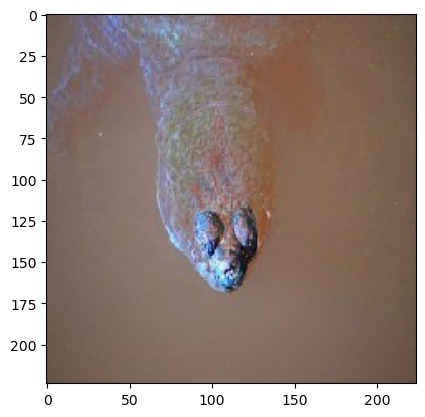

In [68]:
# Prediction example

img = test_set[10][0][3]
plt.imshow(imNormalize(img))

# Convert to tensor
img = np.expand_dims(img, axis=0)
# Make predictions
preds = model.predict(img,steps=1)
preds = preds.flatten()
#print("Output Probabilities:", preds)

# Get classes with highest probabilities
order = np.argsort(preds)
order = order[::-1]

print('Actual Class:',classes[np.argmax(test_set[10][1][3])])

# Top 5
print('Predictions:')
for i in range(5):
    if preds[order[i]] == 0:
        break
    else:
        print(classes[order[i]], ':', preds[order[i]])
